<font color='#E27271'>

# *Unveiling Complex Interconnections Among Companies through Learned Embeddings*</font>

-----------------------
<font color='#E27271'>

Ethan Moody, Eugene Oon, and Sam Shinde</font>

<font color='#E27271'>

August 2023</font>

-----------------------
<font color='#00AED3'>

# **Exploratory Data Analysis (EDA)**</font>

-----------------------


1.   Training dataset: Non-S&P 500 US Publicly Listed Companies
2.   Testing dataset: Non-S&P 500 US Publicly Listed Companies

Source: Non-S&P 500 and S&P 500 SEC 10K `BUSINESS` description downloaded in the earlier step (Notebook: 1.1 Download 10K Data SEC API.ipynb) using subscription based SEC API.

We perform Exploratory Data Analysis (EDA) on this data by examining and visualizing to understand its underlying patterns, trends, and distributions.

## [1] Installs, Imports and Setup Steps

### [1.1] Complete Initial Installs and Import Packages

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

### [1.2] Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## [2] EDA for Training Dataset

In [ ]:
# Define the path to the JSON file containing the data
file_nsp500 = '/content/gdrive/My Drive/data/10K/nsp500_final.json'

# Read the JSON data into a pandas DataFrame
df_train = pd.read_json(file_nsp500)
display(df_train.head())

,ticker,cik,formType,filedAt,linkToTxt,linkToHtml,periodOfReport,year,ind,name,sector,industry,industry_group,business_cnt,business
0,MBLY,1910139,10-K,2023-03-09T16:15:44-05:00,https://www.sec.gov/Archives/edgar/data/191013...,https://www.sec.gov/Archives/edgar/data/191013...,2022-12-31,2022,NASDAQ,Mobileye Global Inc,Consumer Discretionary,Automobile Components,Automobiles & Components,133257,Item 1. Business \n\nIn this Annual Report on...
1,RIVN,1874178,10-K,2023-02-28T17:15:26-05:00,https://www.sec.gov/Archives/edgar/data/187417...,https://www.sec.gov/Archives/edgar/data/187417...,2022-12-31,2022,NASDAQ,Rivian Automotive Inc,Consumer Discretionary,Automobiles,Automobiles & Components,42199,Item 1. Business \n\nOverview \n\nRivian exis...
2,LCID,1811210,10-K,2023-02-28T16:09:35-05:00,https://www.sec.gov/Archives/edgar/data/181121...,https://www.sec.gov/Archives/edgar/data/181121...,2022-12-31,2022,NASDAQ,Lucid Group Inc,Consumer Discretionary,Automobiles,Automobiles & Components,82184,Item 1. Business. \n\nOVERVIEW \n\nMission \n...
3,LEA,842162,10-K,2023-02-09T16:59:45-05:00,https://www.sec.gov/Archives/edgar/data/842162...,https://www.sec.gov/Archives/edgar/data/842162...,2022-12-31,2022,NYSE,Lear Corp,Consumer Discretionary,Automobile Components,Automobiles & Components,88376,ITEM 1 &#8211; BUSINESS \n\nIn this Annual Re...
4,ALV,1034670,10-K,2023-02-16T09:41:48-05:00,https://www.sec.gov/Archives/edgar/data/103467...,https://www.sec.gov/Archives/edgar/data/103467...,2022-12-31,2022,NYSE,Autoliv Inc,Consumer Discretionary,Automobile Components,Automobiles & Components,38394,Item 1. Business \n\n&#160; \n\nGeneral \n\nA...


In [ ]:
# Print information about the DataFrame
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4063 entries, 0 to 4062
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ticker          4063 non-null   object
 1   cik             4063 non-null   int64 
 2   formType        4063 non-null   object
 3   filedAt         4063 non-null   object
 4   linkToTxt       4063 non-null   object
 5   linkToHtml      4063 non-null   object
 6   periodOfReport  4063 non-null   object
 7   year            4063 non-null   int64 
 8   ind             4063 non-null   object
 9   name            4063 non-null   object
 10  sector          3695 non-null   object
 11  industry        3695 non-null   object
 12  industry_group  3695 non-null   object
 13  business_cnt    4063 non-null   int64 
 14  business        4063 non-null   object
dtypes: int64(3), object(12)
memory usage: 476.3+ KB


In [ ]:
# From above, looks like there are null values --> Check for them
missing_GICS = len(df_train[df_train["name"].notnull() & df_train["sector"].isnull()])
print(f"Number of rows with missing GICS information: {missing_GICS}" )

Number of rows with missing GICS information: 368


In [ ]:
# Filter for only those with non null values
df_train = df_train[df_train.notnull().all(axis=1)]
# Print information about the DataFrame
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3695 entries, 0 to 3694
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ticker          3695 non-null   object
 1   cik             3695 non-null   int64 
 2   formType        3695 non-null   object
 3   filedAt         3695 non-null   object
 4   linkToTxt       3695 non-null   object
 5   linkToHtml      3695 non-null   object
 6   periodOfReport  3695 non-null   object
 7   year            3695 non-null   int64 
 8   ind             3695 non-null   object
 9   name            3695 non-null   object
 10  sector          3695 non-null   object
 11  industry        3695 non-null   object
 12  industry_group  3695 non-null   object
 13  business_cnt    3695 non-null   int64 
 14  business        3695 non-null   object
dtypes: int64(3), object(12)
memory usage: 461.9+ KB


In [ ]:
small_len = len(df_train[df_train['business_cnt']<5000])
print(f"Number of rows with business length less than 5000: {small_len}" )

Number of rows with business length less than 5000: 13


In [ ]:
df_train = df_train[df_train['business_cnt']>=5000]
df_train.reset_index(drop=True, inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3682 entries, 0 to 3681
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ticker          3682 non-null   object
 1   cik             3682 non-null   int64 
 2   formType        3682 non-null   object
 3   filedAt         3682 non-null   object
 4   linkToTxt       3682 non-null   object
 5   linkToHtml      3682 non-null   object
 6   periodOfReport  3682 non-null   object
 7   year            3682 non-null   int64 
 8   ind             3682 non-null   object
 9   name            3682 non-null   object
 10  sector          3682 non-null   object
 11  industry        3682 non-null   object
 12  industry_group  3682 non-null   object
 13  business_cnt    3682 non-null   int64 
 14  business        3682 non-null   object
dtypes: int64(3), object(12)
memory usage: 431.6+ KB


In [ ]:
# Check to ensure dataset only contains reporting year 2022 and 10-K reports
print(f"Reporting years in training dataset: {df_train['year'].unique()}")
print(f"Reporting years in training dataset: {df_train['formType'].unique()}")

Reporting years in training dataset: [2022]
Reporting years in training dataset: ['10-K']


In [ ]:
# Check for any duplicated `names` and `ticker`
print(f"Number of rows with duplicated stock names: {sum(df_train.duplicated(subset='name'))}")
print(f"Number of rows with duplicated tickers: {sum(df_train.duplicated(subset='ticker'))}")

Number of rows with duplicated stock names: 0
Number of rows with duplicated tickers: 0


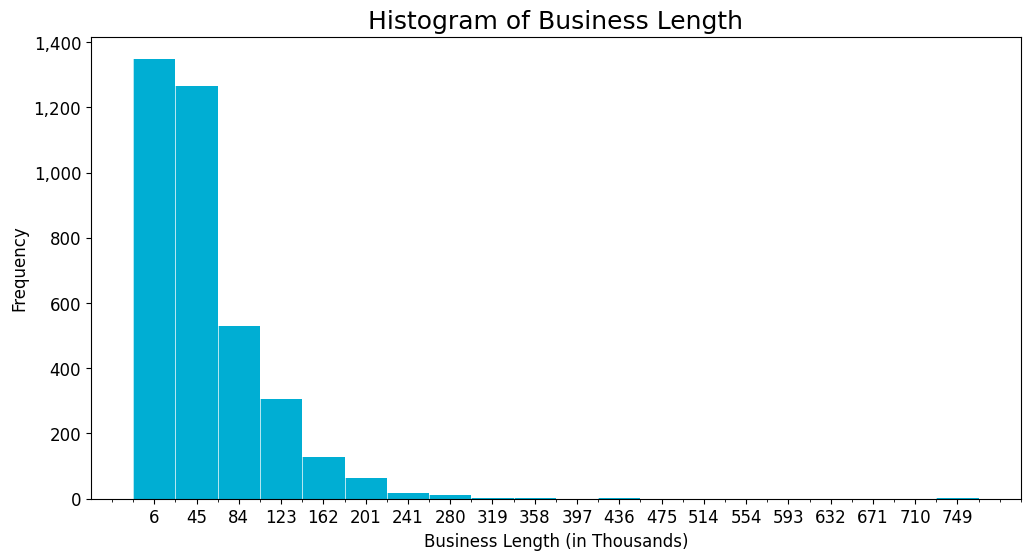

In [ ]:
# Check for length of `business` section - in case of any 0 values or those not able to extract correctly
df_train["business_length"] = df_train["business"].apply(lambda x: len(x))

import matplotlib.ticker as mtick
from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec

#Plot Figure
fig = plt.figure(figsize=(12,6))
n, bins, patches = plt.hist(df_train["business_length"], bins=20, color='#00AED3')

# define minor ticks and draw a grid with them
minor_locator = AutoMinorLocator(2)
plt.gca().xaxis.set_minor_locator(minor_locator)
plt.grid(which='minor', color='white', lw = 0.5)

# x ticks & Labels
xticks = [(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])]
#xticks_labels = [ "{:,.0f}\nto\n{:,.0f}".format(value, bins[idx+1]) for idx, value in enumerate(bins[:-1])]
xticks_labels = [ "{:,.0f}".format(value/1000, bins[idx+1]) for idx, value in enumerate(bins[:-1])]
plt.xticks(xticks, labels = xticks_labels, fontsize=9)
plt.xlabel('Business Length (in Thousands)',fontsize=12)

# y ticks & Labels
fmt = '{x:,.0f}'
yticks = mtick.StrMethodFormatter(fmt)
plt.gca().yaxis.set_major_formatter(yticks)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Frequency',fontsize=12)

# Title
plt.title('Histogram of Business Length', fontsize = 18)
pass

In [ ]:
df_train.head()

,ticker,cik,formType,filedAt,linkToTxt,linkToHtml,periodOfReport,year,ind,name,sector,industry,industry_group,business_cnt,business,business_length
0,MBLY,1910139,10-K,2023-03-09T16:15:44-05:00,https://www.sec.gov/Archives/edgar/data/191013...,https://www.sec.gov/Archives/edgar/data/191013...,2022-12-31,2022,NASDAQ,Mobileye Global Inc,Consumer Discretionary,Automobile Components,Automobiles & Components,133257,Item 1. Business \n\nIn this Annual Report on...,19156
1,RIVN,1874178,10-K,2023-02-28T17:15:26-05:00,https://www.sec.gov/Archives/edgar/data/187417...,https://www.sec.gov/Archives/edgar/data/187417...,2022-12-31,2022,NASDAQ,Rivian Automotive Inc,Consumer Discretionary,Automobiles,Automobiles & Components,42199,Item 1. Business \n\nOverview \n\nRivian exis...,6104
2,LCID,1811210,10-K,2023-02-28T16:09:35-05:00,https://www.sec.gov/Archives/edgar/data/181121...,https://www.sec.gov/Archives/edgar/data/181121...,2022-12-31,2022,NASDAQ,Lucid Group Inc,Consumer Discretionary,Automobiles,Automobiles & Components,82184,Item 1. Business. \n\nOVERVIEW \n\nMission \n...,11892
3,LEA,842162,10-K,2023-02-09T16:59:45-05:00,https://www.sec.gov/Archives/edgar/data/842162...,https://www.sec.gov/Archives/edgar/data/842162...,2022-12-31,2022,NYSE,Lear Corp,Consumer Discretionary,Automobile Components,Automobiles & Components,88376,ITEM 1 &#8211; BUSINESS \n\nIn this Annual Re...,12508
4,ALV,1034670,10-K,2023-02-16T09:41:48-05:00,https://www.sec.gov/Archives/edgar/data/103467...,https://www.sec.gov/Archives/edgar/data/103467...,2022-12-31,2022,NYSE,Autoliv Inc,Consumer Discretionary,Automobile Components,Automobiles & Components,38394,Item 1. Business \n\n&#160; \n\nGeneral \n\nA...,5531


In [ ]:
# Keep only the columns "name", "ticker", "cik", "business", and "sector"
df_train = df_train[["name","ticker","cik","business","sector"]]

# Print information about the DataFrame
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3682 entries, 0 to 3681
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      3682 non-null   object
 1   ticker    3682 non-null   object
 2   cik       3682 non-null   int64 
 3   business  3682 non-null   object
 4   sector    3682 non-null   object
dtypes: int64(1), object(4)
memory usage: 144.0+ KB
None


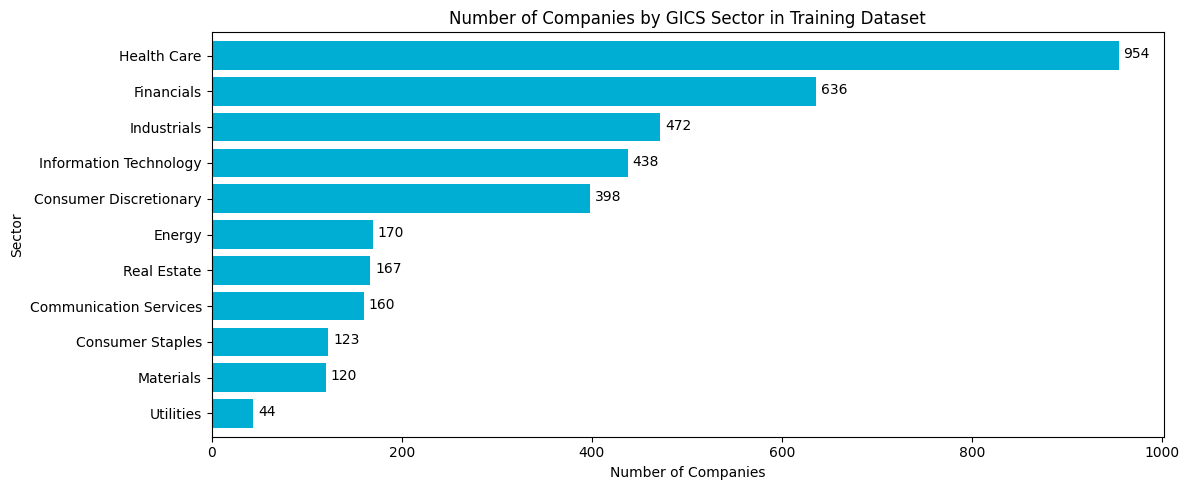

In [ ]:
# Group by "sector" and count the number of companies in each sector
df_train_plot = df_train.groupby(["sector"])["ticker"].count()
df_train_plot = df_train_plot.sort_values()
# Create the bar plot
plt.figure(figsize=(12, 5))
ax = df_train_plot.plot(kind='barh', color='#00AED3',width = 0.8)
plt.title('Number of Companies by GICS Sector in Training Dataset')
plt.ylabel('Sector')
plt.xlabel('Number of Companies')

# Show the values on the bars
for p in ax.patches:
  width = p.get_width()
    # ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
    #             ha='center', va='bottom', fontsize=9)
  plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(),
            '{:1.0f}'.format(width),
            ha='left', va='center')
plt.tight_layout()
plt.show()


## [3] Basic EDA for Testing Dataset

In [ ]:
# Define the path to the JSON file containing the data
file_sp500 = '/content/gdrive/My Drive/data/10K/sp500_final.json'

# Read the JSON data into a pandas DataFrame
df_test = pd.read_json(file_sp500)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ticker          500 non-null    object
 1   cik             500 non-null    object
 2   formType        500 non-null    object
 3   filedAt         500 non-null    object
 4   linkToTxt       500 non-null    object
 5   linkToHtml      500 non-null    object
 6   periodOfReport  500 non-null    object
 7   year            500 non-null    int64 
 8   ind             500 non-null    object
 9   name            500 non-null    object
 10  sector          500 non-null    object
 11  industry        500 non-null    object
 12  industry_group  500 non-null    object
 13  business_cnt    500 non-null    int64 
 14  business        500 non-null    object
dtypes: int64(2), object(13)
memory usage: 58.7+ KB


In [ ]:
# Check for length of `business` section - in case of any 0 values or those not able to extract correctly
df_test["business_length"] = df_test["business"].apply(lambda x: len(x))
# Check business length
df_test["business_length"].sort_values().head(10)

137     8116
40      8763
412    10491
339    10943
27     12426
184    12449
281    12924
206    13010
81     13243
131    13851
Name: business_length, dtype: int64

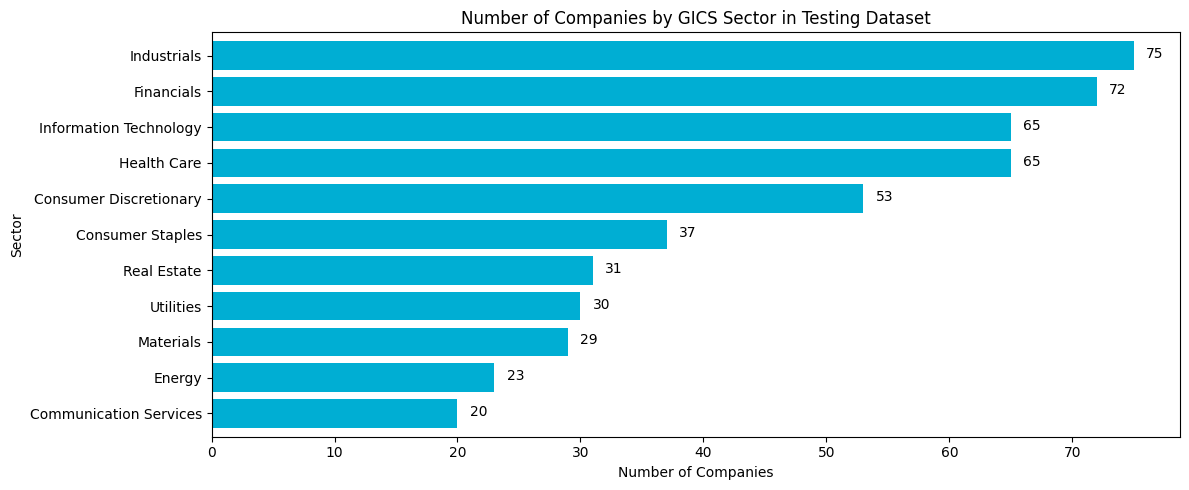

In [ ]:
# Group by "sector" and count the number of companies in each sector
df_test_plot = df_test.groupby(["sector"])["ticker"].count()
df_test_plot = df_test_plot.sort_values()

# Create the bar plot
plt.figure(figsize=(12, 5))
ax = df_test_plot.plot(kind='barh', color='#00AED3',width = 0.8)
plt.title('Number of Companies by GICS Sector in Testing Dataset')
plt.ylabel('Sector')
plt.xlabel('Number of Companies')

# Show the values on the bars
for p in ax.patches:
  width = p.get_width()
    # ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
    #             ha='center', va='bottom', fontsize=9)
  plt.text(1+p.get_width(), p.get_y()+0.55*p.get_height(),
            '{:1.0f}'.format(width),
            ha='left', va='center')
plt.tight_layout()
plt.show()